In [1]:
from mpl_sankey import sankey

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
data = pd.DataFrame([[1, 'a', 1, 'I', 1, 'success'],
                     [2, 'b', 2, 'III', 2, 'discard'],
                     [1, 'b', 1, 'II', 2, 'success'],
                     [1, 'c', 1, 'II', 2, 'discard'],
                     [2.5, 'a', 2, 'IV', 1, 'discard'],
                     [2, 'a', 1, 'I', 1, 'success']],
                    columns=['Weight', 'First', 'Then', 'After', 'Finally', 'Outcome'])

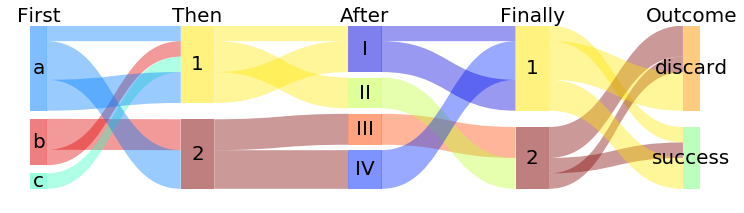

In [4]:
plt.figure(figsize=(12, 3))
sankey(data)

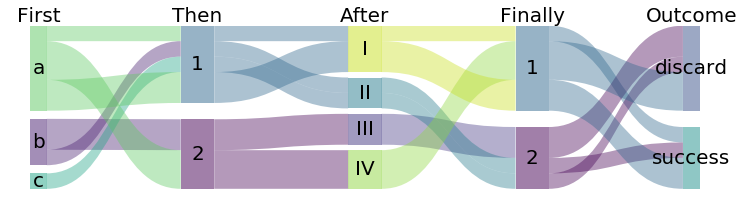

In [5]:
plt.figure(figsize=(12, 3))
sankey(data, cmap=plt.get_cmap('viridis'))

(0.0, 4.0, 0.0, 1.0)

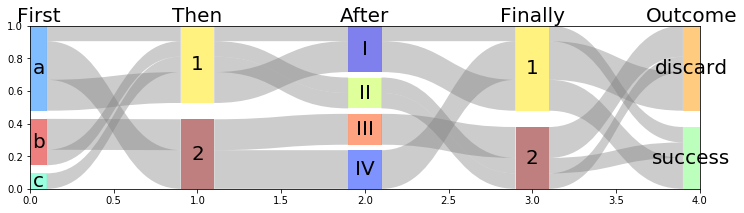

In [6]:
plt.figure(figsize=(12, 3))
sankey(data, flows_color='grey')
plt.axis('on')

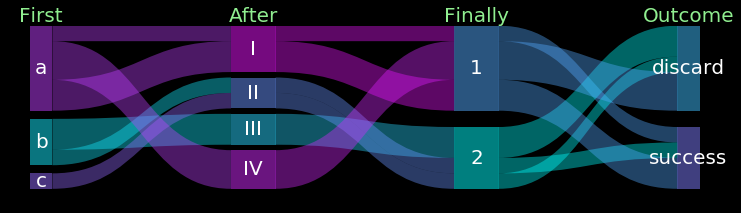

In [7]:
fig = plt.figure(figsize=(12, 3))
fig.set_facecolor('black')
sankey(data.drop('Then', axis=1), cmap=plt.get_cmap('cool'), titles_color='lightgreen', labels_color='white')

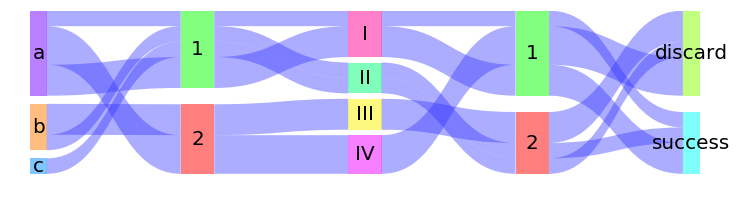

In [8]:
plt.figure(figsize=(12, 3))
sankey(data, cmap=plt.get_cmap('hsv'), flows_color=(.2, .2, 1), titles_color=None)

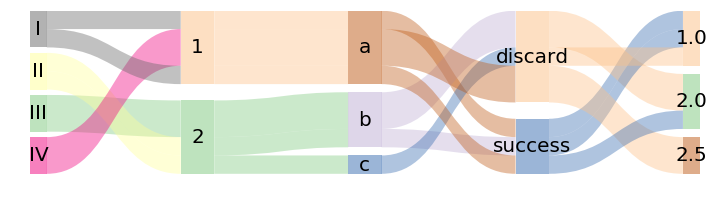

In [9]:
# Swap columns around, and use 'Then' as weights:
plt.figure(figsize=(12, 3))
sankey(data[['Then'] + list(data.columns.difference(['Then']))],
       cmap=plt.get_cmap('Accent'), titles_color=None)

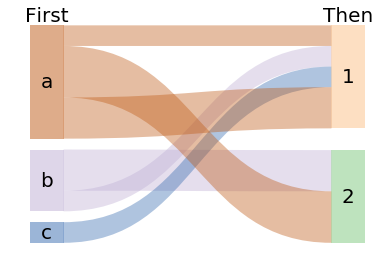

In [10]:
# Single transition:
sankey(data.loc[:, :'Then'],
       cmap=plt.get_cmap('Accent'))